Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [30]:
# imports
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns

In [31]:
bike_stations_df = pd.read_csv('bike_stations.csv', index_col = 0)
yelp_business_df = pd.read_csv('yelp_business.csv', index_col = 0)

In [32]:
Business_and_Bike_Stations_df = pd.merge(yelp_business_df, bike_stations_df, on = 'Station Name')
Business_and_Bike_Stations_df = Business_and_Bike_Stations_df.drop(columns=['Latitude', 'Longitude'])

In [37]:
Business_and_Bike_Stations_df['Number of Bikes'] = Business_and_Bike_Stations_df['Available Bikes'] + Business_and_Bike_Stations_df['Empty Slots']
Business_and_Bike_Stations_df

,Station Name,Station Latitude,Station Longitude,Business Category,Business Name,Rating,Number of Reviews,Address,Contact,Available Bikes,Empty Slots,Number of Bikes
0,W 100 St & Manhattan Ave,40.795000,-73.964500,Bars,The Calaveras,4.5,231,949 Columbus Ave,(646) 484-6533,33,0,33
1,W 100 St & Manhattan Ave,40.795000,-73.964500,Comfort Food,Jacob's Pickles,4.0,5409,509 Amsterdam Ave,(212) 470-5566,33,0,33
2,W 100 St & Manhattan Ave,40.795000,-73.964500,Sardinian,Arco Cafe,4.5,353,886 Amsterdam Ave,(646) 781-9080,33,0,33
3,W 100 St & Manhattan Ave,40.795000,-73.964500,Burgers,Bareburger - Upper West Side,3.5,393,795 Columbus Ave,(646) 559-2986,33,0,33
4,W 100 St & Manhattan Ave,40.795000,-73.964500,French,Amelie,4.5,296,566 Amsterdam Ave,(646) 422-7167,33,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9 Ave & W 22 St,40.745497,-74.001971,Spanish,Salinas,4.0,1007,136 9th Ave,(212) 776-1990,45,3,48
9996,9 Ave & W 22 St,40.745497,-74.001971,Georgian,Chama Mama - New York,4.5,684,149 W 14th St,(646) 438-9007,45,3,48
9997,9 Ave & W 22 St,40.745497,-74.001971,Ramen,Kame,4.5,768,330 8th Ave,(917) 391-8587,45,3,48
9998,9 Ave & W 22 St,40.745497,-74.001971,Mexican,Temerario,4.0,377,198 8th Ave,(212) 645-2100,45,3,48


In [38]:

Business_and_Bike_Stations_df.to_csv('Business_and_Bike_Stations.csv')

In [39]:
grouped_business = Business_and_Bike_Stations_df.groupby('Station Name').agg({
    'Rating': 'mean',
    'Number of Reviews': 'mean',
    'Number of Bikes': 'max'
}).reset_index()

grouped_business = grouped_business.rename(columns={
    'Rating': 'Average Rating',
    'Number of Reviews': 'Average Reviews',
})
grouped_business_df = pd.DataFrame(grouped_business)
print(grouped_business_df)

                     Station Name  Average Rating  Average Reviews  \
0                1 Ave & E 110 St           4.350           302.45   
1                 1 Ave & E 30 St           4.325          1028.95   
2                 1 Ave & E 62 St           4.250           687.30   
3                 1 Ave & E 68 St           4.300           863.70   
4                 1 Ave & E 94 St           4.175           496.20   
..                            ...             ...              ...   
495  Willoughby Ave & Walworth St           4.150           346.05   
496  Willoughby Ave & Wyckoff Ave           4.250           347.35   
497      Willoughby St & Fleet St           4.150           436.90   
498     Wyckoff Av & Jefferson St           4.325           310.60   
499  Wythe Ave & Metropolitan Ave           4.175           804.15   

     Number of Bikes  
0                 24  
1                 33  
2                 34  
3                 51  
4                 38  
..               ... 

In [40]:
grouped_business_df.to_csv('grouped_business.csv')

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [41]:
Business_and_Bike_Stations_df.shape

(10000, 12)

In [42]:
Business_and_Bike_Stations_df['Station Name'].describe()

count                        10000
unique                         500
top       W 100 St & Manhattan Ave
freq                            20
Name: Station Name, dtype: object

In [43]:
Business_and_Bike_Stations_df['Rating'].describe()

count    10000.000000
mean         4.235900
std          0.341267
min          2.500000
25%          4.000000
50%          4.000000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [44]:
Business_and_Bike_Stations_df['Number of Bikes'].describe()

count    10000.00000
mean        32.27000
std         18.20138
min         11.00000
25%         20.00000
50%         26.00000
75%         38.25000
max        110.00000
Name: Number of Bikes, dtype: float64

<Axes: xlabel='Number of Bikes', ylabel='Count'>

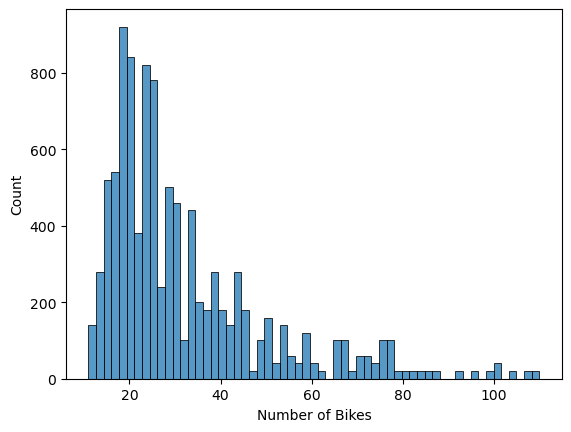

In [45]:
sns.histplot(Business_and_Bike_Stations_df['Number of Bikes'])

<Axes: xlabel='Rating', ylabel='Count'>

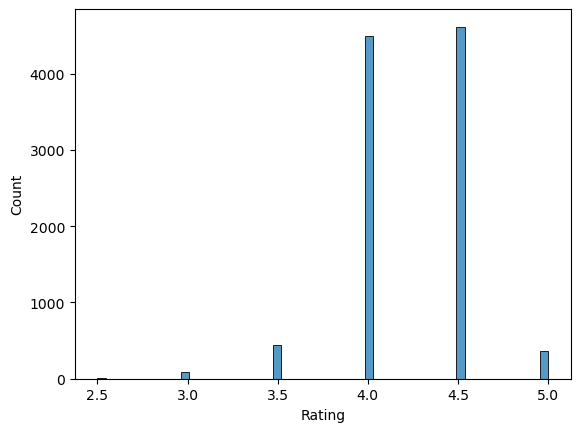

In [46]:
sns.histplot(Business_and_Bike_Stations_df['Rating'])

##### Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [47]:
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [48]:
connection = create_connection("Business_and_Bike_Stations.sqlite")
connect = sqlite3.connect('Business_and_Bike_Stations.sqlite')

Connection to SQLite DB successful


In [49]:
table_name = 'Business_and_Bike_Stations'
Business_and_Bike_Stations_df.to_sql(table_name, connect, if_exists='replace', index=False)

10000

In [50]:
connect.commit()
connect.close()

Look at the data before and after the join to validate your data.

In [51]:
print(len(bike_stations_df.index))
print(bike_stations_df.shape[0])
print(bike_stations_df.shape[1])
print(bike_stations_df[bike_stations_df.columns[0]].count())

1986
1986
5
1986


In [52]:
print(len(yelp_business_df.index))
print(yelp_business_df.shape[0])
print(yelp_business_df.shape[1])
print(yelp_business_df[yelp_business_df.columns[0]].count())

10000
10000
9
10000


In [53]:
print(len(Business_and_Bike_Stations_df.index))
print(Business_and_Bike_Stations_df.shape[0])
print(Business_and_Bike_Stations_df.shape[1])
print(Business_and_Bike_Stations_df[Business_and_Bike_Stations_df.columns[0]].count())

10000
10000
12
10000
